# Week 2 Homework Assignment: Data Preprocessing and EDA
# CDS 403 Machine Learning - Spring 2025

Name: Eric Wu


ASSIGNMENT OVERVIEW
------------------
Due Date: [Tuesday 4:30 PM]
Points: 100 , 10 points of the lab code, where you do data preprocessing steps
Submission: Submit your completed Python notebook via Blackboard
Dataset: California Housing dataset (provided in lab)

This assignment builds on the lab exercises to reinforce your understanding of
data preprocessing and exploratory data analysis techniques. So we will use the
Lab dataset and starting from those steps and adds these questions too. The
Challenge questions id optional but highly encouraged for your knowledge.

### Submission Requirements ###
1. Well-commented notebook preffered Jubter notebook or Google Colab
2. Clear documentation of your approach
3. Visualizations with proper labels and titles, you will miss points if not
4. Written interpretations of your findings
5. Mention Any assumptions or limitations you identified

### Grading Criteria ###
- Correct implementation
- Code quality and documentation
- Data preprocessing (which is already in the lab notebook)
- Exploratory data analysis (which is already in the lab notebook)
- Visualization quality
- Your interpretation and insights
- Bonus points for additional challenges

### Resources ###
- Pandas documentation: https://pandas.pydata.org/docs/
- Seaborn tutorials: https://seaborn.pydata.org/tutorial.html
- Matplotlib guides: https://matplotlib.org/stable/tutorials/index.html
- Lab notebook from Blackboard
#For your info the dataset is from the Panda Library
# Load the California Housing dataset from Panda


In [144]:
#import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['target'] = housing.target

print('View first 5 rows')
print(df.head())

'''Source: https://scikit-learn.org/dev/modules/generated/sklearn.datasets.fetch_california_housing.html'''

'''### Questions? ###
Post on the course discussion board or email the instructor at aalmalki@gmu.edu'''

View first 5 rows
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


'### Questions? ###\nPost on the course discussion board or email the instructor at aalmalki@gmu.edu'

In [146]:
#begin preprocessing

#get shape and column information

#rename target feature to price
df['PRICE'] = housing.target
df.drop('target', axis=1, inplace=True) if 'target' in df.columns else None

#shape
print(f'Df shape is {df.shape}') #20640 rows, 9 features. Target seems to be the price that we should predict to.

#column information
print("\nColumn information:", df.info())

Df shape is (20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

Column information: None


In [147]:
#step 2: clean data
'''
-check missing values
-check duplicates
-check outliers
'''

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nDuplicate rows in the dataset:", df.duplicated().sum())

print("\nBasic statistics of numerical columns:")
print(df.describe())

from scipy import stats
num_cols = df.select_dtypes(include=[np.float64, np.int64]).columns #get numerical cols

#find outliers of numerical columns
for col in num_cols:
  z = np.abs(stats.zscore(df[col]))
  outlier_ndx = np.where(z > 3)
  print("\nNumber of outliers in", col, ":", len(outlier_ndx[0]))


Missing values in each column:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

Duplicate rows in the dataset: 0

Basic statistics of numerical columns:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      

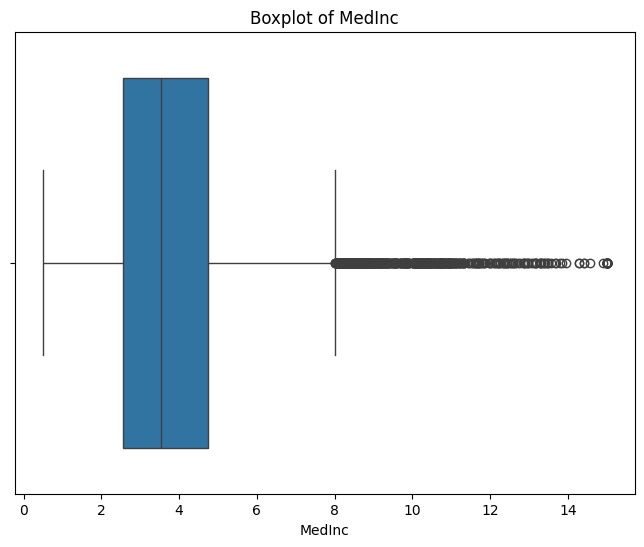

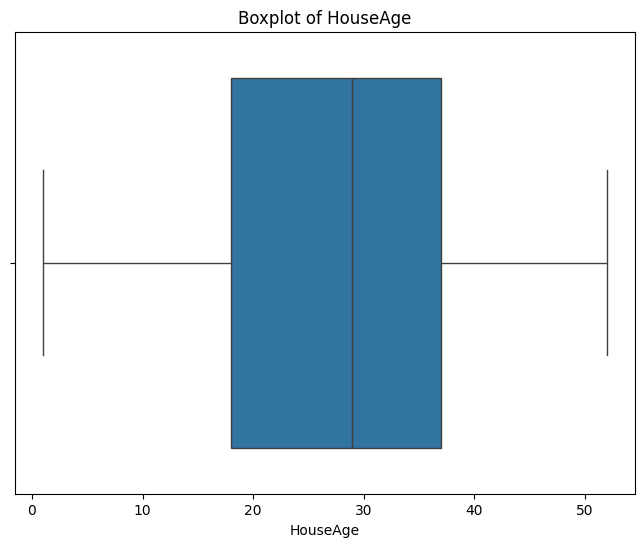

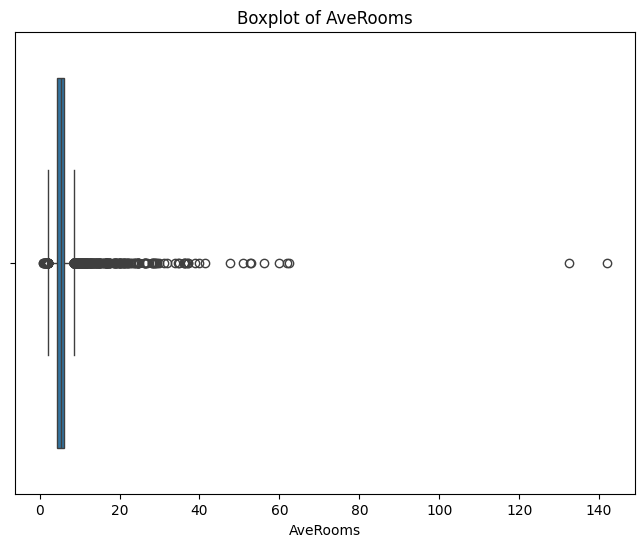

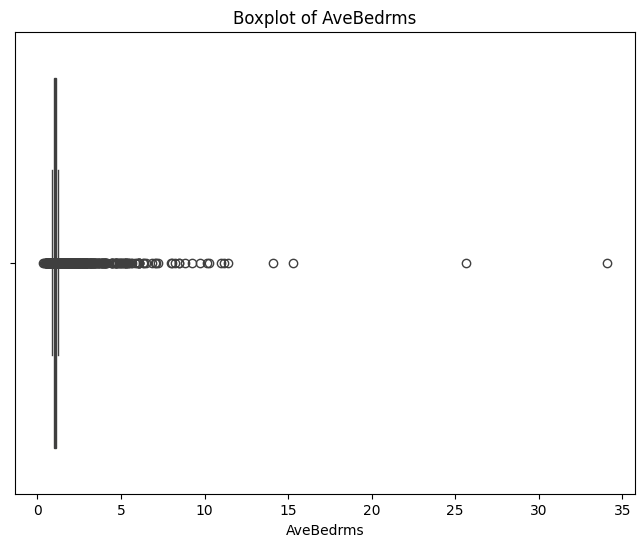

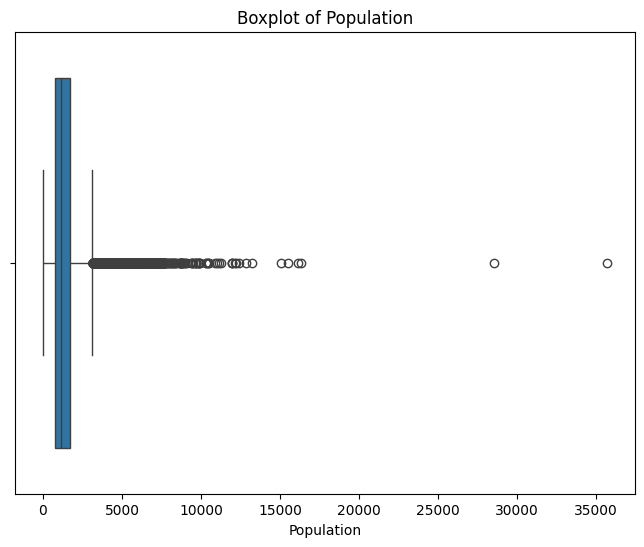

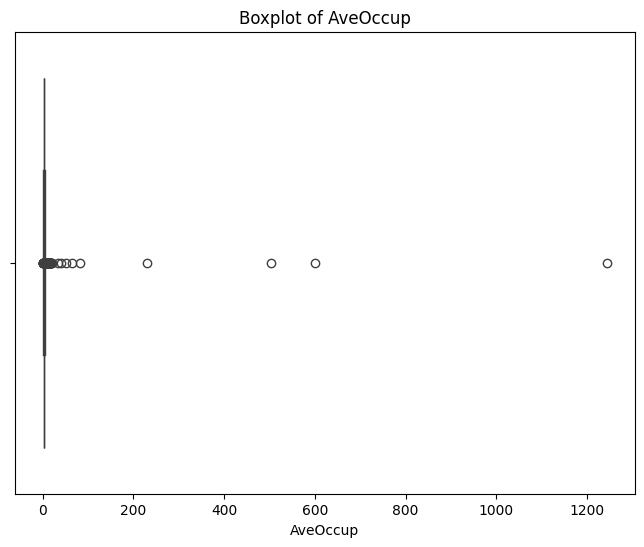

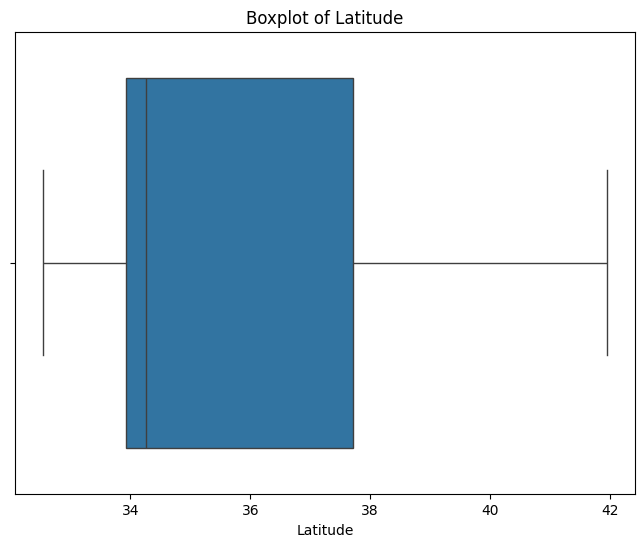

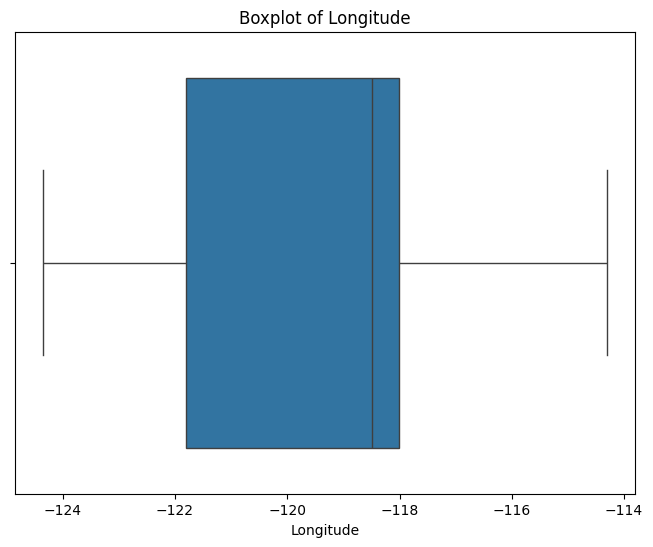

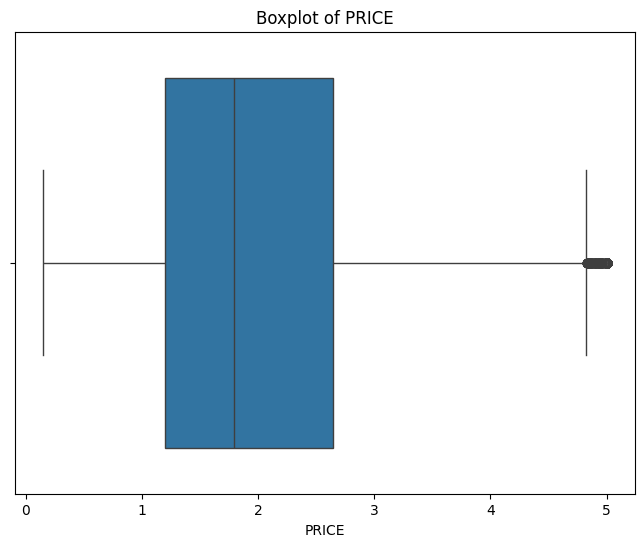

In [148]:
#plot boxplots of numerical features to visualize outliers

for col in num_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

It seems averooms, avebedrms, population, and aveoccup have quite significant outliers.

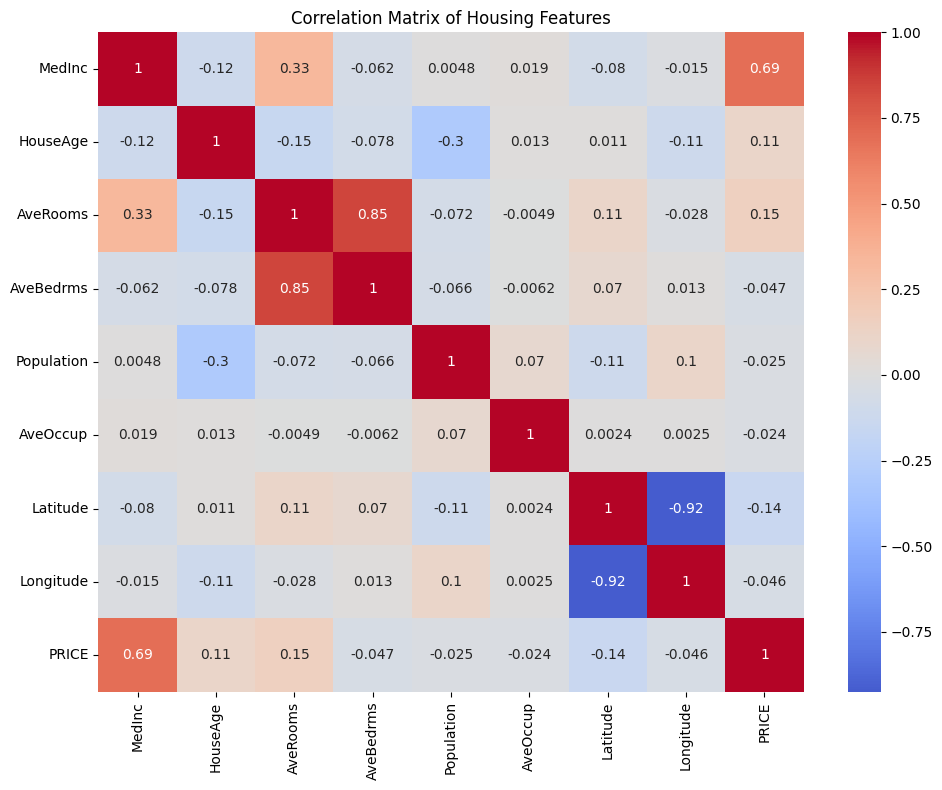

In [149]:
#step 3 EDA

# Create a correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Housing Features')
plt.tight_layout()
plt.show()

In [150]:
#find features most correlated with Price

price_corrl = (correlation_matrix['PRICE'].sort_values(ascending=False))

threshold = 0.1 #threshold for comparison

print(abs(price_corrl) > threshold)
print(price_corrl)

PRICE          True
MedInc         True
AveRooms       True
HouseAge       True
AveOccup      False
Population    False
Longitude     False
AveBedrms     False
Latitude       True
Name: PRICE, dtype: bool
PRICE         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: PRICE, dtype: float64


It seems price and median income are the most correlated with avg rooms and avg house age being somewhat correlated

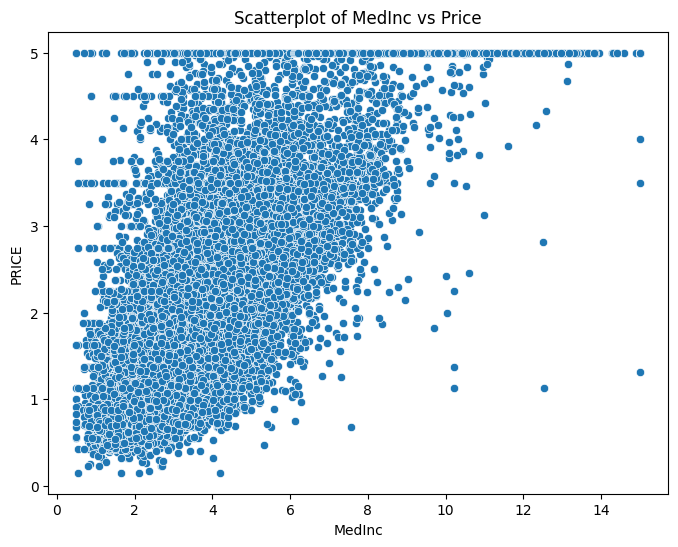

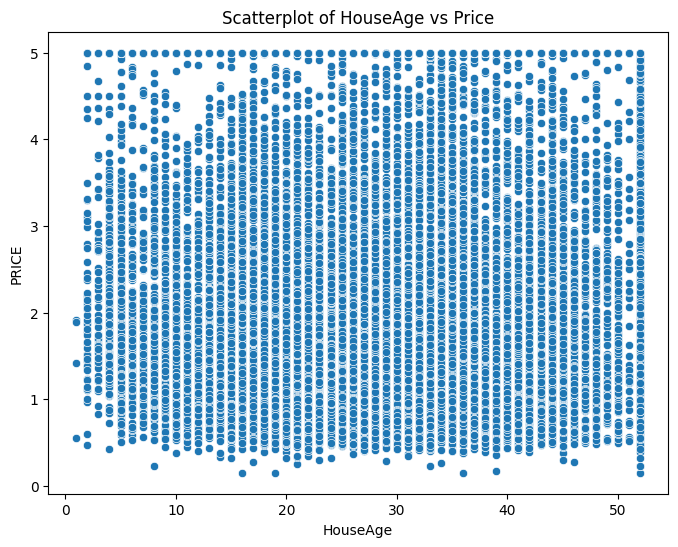

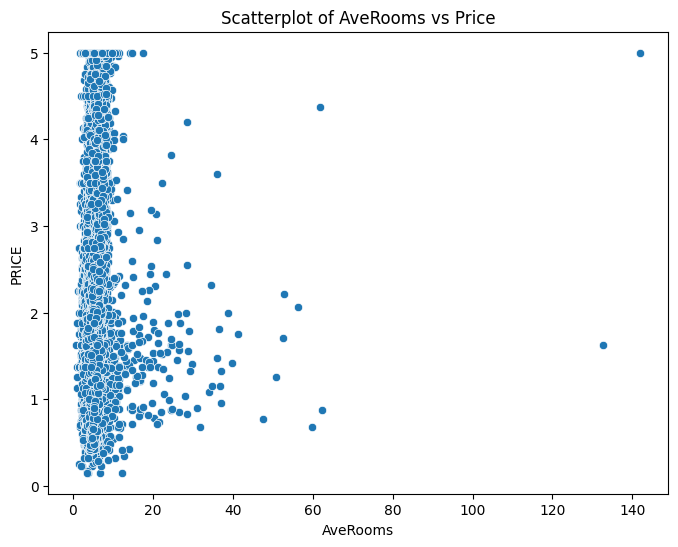

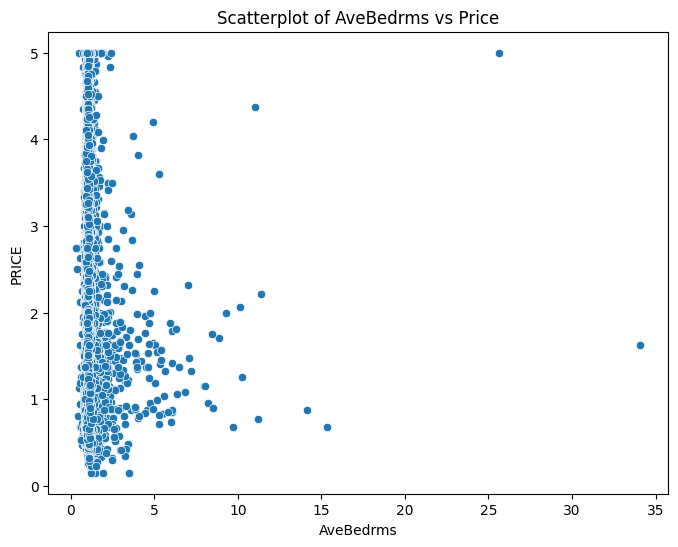

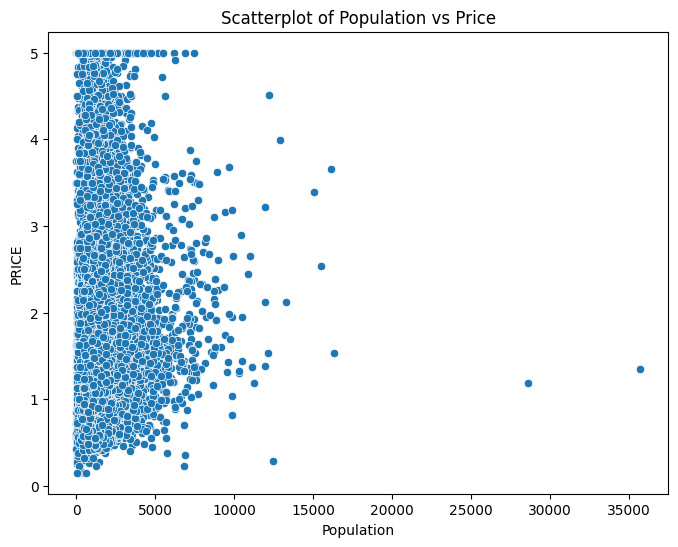

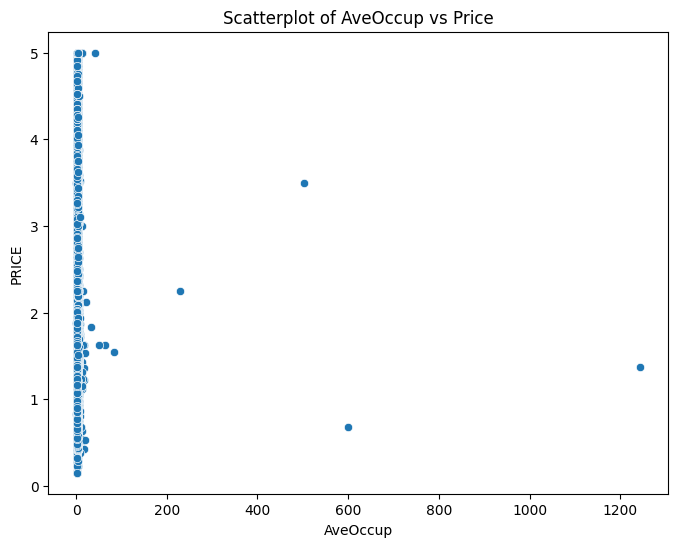

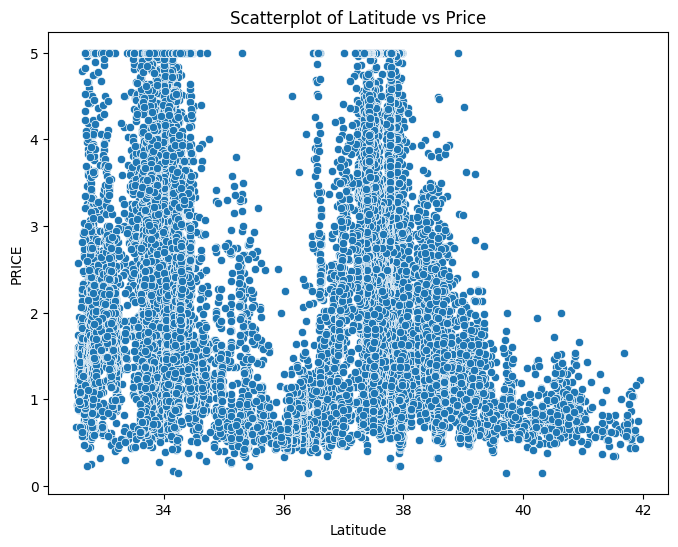

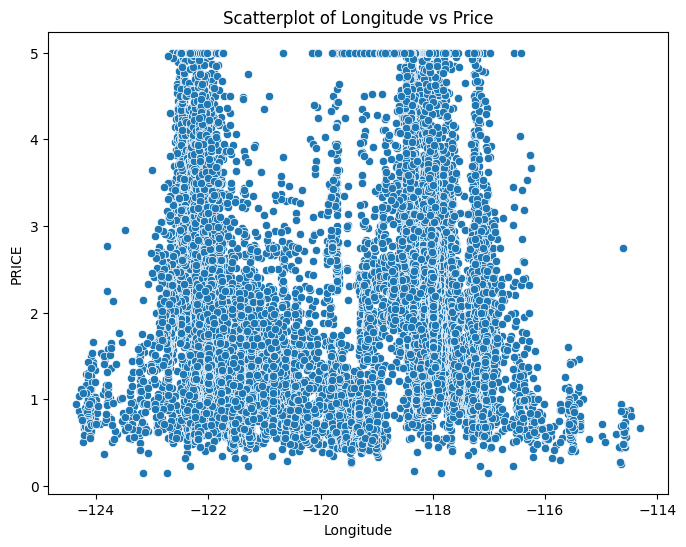

In [151]:
#plot price vs other features

for col in df.columns[:-1]:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=df[col], y=df['PRICE'])
  plt.title(f'Scatterplot of {col} vs Price')
  plt.show

It seems only price and median income have a linear relationship. There is an interesting trend in price vs avg rooms and avg bedrooms. It seems their are expensive and not so expensive houses with not that many bedrooms/rooms

In [152]:
#step 4: Feature engineering

#create AGE_CATEGORY
df['AGE_CATEGORY'] = pd.qcut(df['HouseAge'], q=4, labels=['New', 'Medium', 'Old', 'Very Old'])

#check for missing values
print(df['AGE_CATEGORY'].value_counts().sum())

#check df
print(df.head())

20640
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE AGE_CATEGORY  
0    -122.23  4.526     Very Old  
1    -122.22  3.585       Medium  
2    -122.24  3.521     Very Old  
3    -122.25  3.413     Very Old  
4    -122.25  3.422     Very Old  


In [153]:
import geopandas as gpd

In [154]:
#step4 cont

#create a countys category

url = "https://github.com/ewu22gmu/Test_Photo1_CDS468/raw/refs/heads/main/ca_counties.zip"
california_counties = gpd.read_file(url)
print(california_counties.shape) #check shape
print(california_counties.columns) #check for feature names

T_missing = california_counties.isnull().sum().sum()
print('has missing values' if T_missing == 0 else 'No missing values') #check for missing values

print(california_counties.head()) #check df

#drop columns
'''keep = ['NAMELSAD', 'geometry']
california_counties = california_counties[keep]'''

cali_crs = california_counties.crs #get spatial mapping crs from califonia counties

(58, 20)
Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')
No missing values
  STATEFP COUNTYFP  COUNTYNS  GEOID           NAME              NAMELSAD LSAD  \
0      06      091  00277310  06091         Sierra         Sierra County   06   
1      06      067  00277298  06067     Sacramento     Sacramento County   06   
2      06      083  00277306  06083  Santa Barbara  Santa Barbara County   06   
3      06      009  01675885  06009      Calaveras      Calaveras County   06   
4      06      111  00277320  06111        Ventura        Ventura County   06   

  CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT         ALAND        AWATER  \
0      H1  G4020  None   None     None        A  2.468695e+09  2.329911e+07   
1      H1  G4020   472  40900     None        A  2.499984e+

In [155]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']), crs='EPSG:4326') #project housing data to spatial mapping
gdf = gdf.to_crs('EPSG:3857')  #reproject to EPSG:3857
gdf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE,AGE_CATEGORY,geometry
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,Very Old,POINT (-13606581.36 4562487.679)
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,Medium,POINT (-13605468.165 4559667.342)
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,Very Old,POINT (-13607694.555 4558257.461)
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,Very Old,POINT (-13608807.749 4558257.461)
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,Very Old,POINT (-13608807.749 4558257.461)


In [156]:
df_with_regions = gpd.sjoin(gdf, california_counties, how="left", predicate='within') #join housing data with spatial data
df_with_regions.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE,AGE_CATEGORY,...,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,Very Old,...,488,41860,36084,A,1.909615e+09,216907015.0,+37.6471385,-121.9124880,309844.135329,3.398123e+09
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,Medium,...,488,41860,36084,A,1.909615e+09,216907015.0,+37.6471385,-121.9124880,309844.135329,3.398123e+09
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,Very Old,...,488,41860,36084,A,1.909615e+09,216907015.0,+37.6471385,-121.9124880,309844.135329,3.398123e+09
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,Very Old,...,488,41860,36084,A,1.909615e+09,216907015.0,+37.6471385,-121.9124880,309844.135329,3.398123e+09
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,Very Old,...,488,41860,36084,A,1.909615e+09,216907015.0,+37.6471385,-121.9124880,309844.135329,3.398123e+09


In [157]:
'''df_with_regions.drop(columns=['index_right', 'geometry'], inplace=True) #drop vestigial columns from join
df_with_regions.head()'''

"df_with_regions.drop(columns=['index_right', 'geometry'], inplace=True) #drop vestigial columns from join\ndf_with_regions.head()"

In [158]:
#sanity check
cat_cols = df_with_regions.select_dtypes(include=['object', 'category']).columns #get categorical columns
print(cat_cols) #check categorical columns

#summary stats for categorical variables

print(df_with_regions.describe(include='object')) #get summary stats for categorical variables

Index(['AGE_CATEGORY', 'STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME',
       'NAMELSAD', 'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP',
       'FUNCSTAT', 'INTPTLAT', 'INTPTLON'],
      dtype='object')
       STATEFP COUNTYFP  COUNTYNS  GEOID         NAME            NAMELSAD  \
count    20637    20637     20637  20637        20637               20637   
unique       1       58        58     58           58                  58   
top         06      037  00277283  06037  Los Angeles  Los Angeles County   
freq     20637     5824      5824   5824         5824                5824   

         LSAD CLASSFP  MTFCC  CSAFP CBSAFP METDIVFP FUNCSTAT     INTPTLAT  \
count   20637   20637  20637  16816  20366    10244    20637        20637   
unique      1       2      1      5     34        5        2           58   
top        06      H1  G4020    348  31080    31084        A  +34.1963983   
freq    20637   20062  20637   9245   7442     5824    20062         5824   

         

In [159]:
print(df_with_regions['NAMELSAD'].value_counts()) #get value counts for each county

NAMELSAD
Los Angeles County        5824
Orange County             1618
San Diego County          1609
Alameda County            1017
Santa Clara County        1003
San Bernardino County      831
Sacramento County          688
Contra Costa County        597
Riverside County           588
San Francisco County       575
Fresno County              525
San Mateo County           447
San Joaquin County         419
Ventura County             384
Kern County                370
Sonoma County              313
Santa Barbara County       307
Stanislaus County          303
Tulare County              258
Monterey County            202
Solano County              199
Santa Cruz County          191
Marin County               166
Butte County               156
San Luis Obispo County     139
Placer County              132
Merced County              128
Humboldt County            127
Shasta County              121
El Dorado County           120
Imperial County            118
Napa County                103

In [160]:
#step 5 Data preprocessing

# Separate features and target

# Split the data

# Scale the features

I electied to skip this step since it doesn't appear that we are making predictions yet.

## Exercise 1 (30 points)
# Calculate and visualize the average house price by AGE_CATEGORY
"""
Hints:
- Use df.groupby() to group data by AGE_CATEGORY
- Consider using agg() or mean() for calculations
- For visualization, try:
    - Bar plot (sns.barplot)
    - Box plot (sns.boxplot)
    - Or violin plot (sns.violinplot)
- Don't forget to add proper labels and title
- Consider adding error bars to show variance

Example starter code:
```python
# Calculating average prices
avg_prices = df.groupby('AGE_CATEGORY')['PRICE'].mean()

# Visualization
plt.figure(figsize=(10, 6))
# Your plotting code here
```
"""

AGE_CATEGORY
New         1.932760
Medium      2.051372
Old         2.067795
Very Old    2.234164
Name: PRICE, dtype: float64


<ipython-input-161-80fda8920e62>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_age_category = df.groupby('AGE_CATEGORY')['PRICE'].mean()


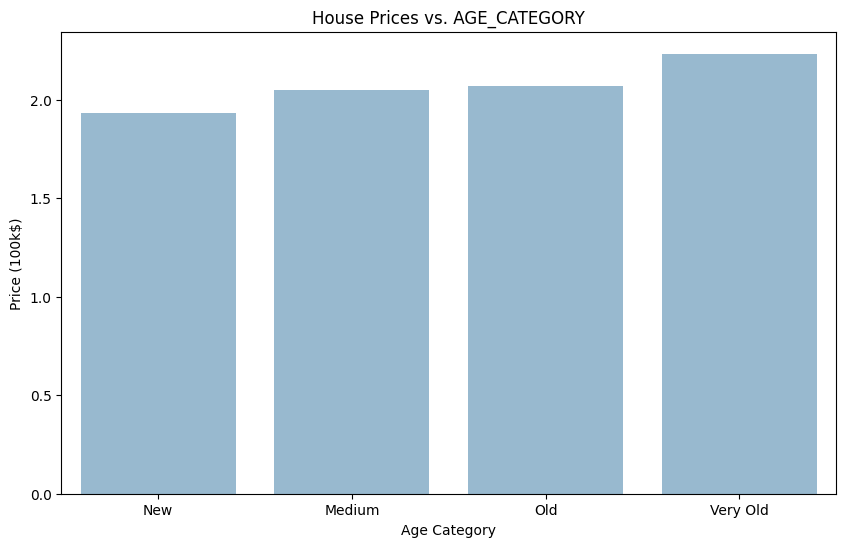

In [161]:
#1. Calculate and visualize the average house price by AGE_CATEGORY

#print(df.head())

avg_price_by_age_category = df.groupby('AGE_CATEGORY')['PRICE'].mean()
print(avg_price_by_age_category)

# Relationship between median income and house prices
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_age_category.index, y=avg_price_by_age_category.values, alpha=0.5)
plt.title('House Prices vs. AGE_CATEGORY')
plt.ylabel('Price (100k$)')
plt.xlabel('Age Category')
plt.show()

It appears the age category of the house affects the price. Specifically, older houses are more expensive on average.

## Exercise 2 (30 points)
# Create a new feature that represents population density
"""
Hints:
- Population density = population / area
- You'll need to use the following columns:
    - population = AveOccup * Households
    - Consider what represents your area unit
- Remember to:
    - Handle edge cases (e.g., division by zero)
    - Name your new feature appropriately
    - Add comments explaining your calculations
- Validate your results make sense

Example starter code:
```python
# Calculate population first
df['Population'] = df['AveOccup'] * df['Households']
# Calculate density
# Your code here
```
"""

In [162]:
#create Population_Density feature

min_lat = df['Latitude'].min()
max_lat = df['Latitude'].max()
min_lon = df['Longitude'].min()
max_lon = df['Longitude'].max()

#approximate area assuming lon and lat can map to km
#convert latitude and longitude to aprox km
lat_diff_km = (max_lat - min_lat) * 111  # 1 degree of latitude ≈ 111 km
lon_diff_km = (max_lon - min_lon) * 85  # 1 degree of longitude ≈ 85 km in CA on avg according to google
area_sq_km = lat_diff_km * lon_diff_km

df['Population_Density'] = df['Population'] / (area_sq_km / len(df)) # Area per row

print(df[['Latitude', 'Longitude', 'Population', 'Population_Density']].head())

   Latitude  Longitude  Population  Population_Density
0     37.88    -122.23       322.0            7.455904
1     37.86    -122.22      2401.0           55.595112
2     37.85    -122.24       496.0           11.484871
3     37.85    -122.25       558.0           12.920480
4     37.85    -122.25       565.0           13.082565


We are going to assume 1/69 degree of longitude and latitude is about 1 mile. So a square repersenting area will be 25/69 degree longitude x 25/69 degree longitude or 25 x 25 miles. That way we can divide population in a square by 25/25 miles to get a population per square mile.

In [163]:
# Calculate Households first
df['Households'] = df['Population'] / df['AveOccup'] #isolate households feature
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE AGE_CATEGORY  Population_Density  Households  
0    -122.23  4.526     Very Old            7.455904       126.0  
1    -122.22  3.585       Medium           55.595112      1138.0  
2    -122.24  3.521     Very Old           11.484871       177.0  
3    -122.25  3.413     Very Old           12.920480       219.0  
4    -122.25  3.422     Very Old           13.082565       259.0  


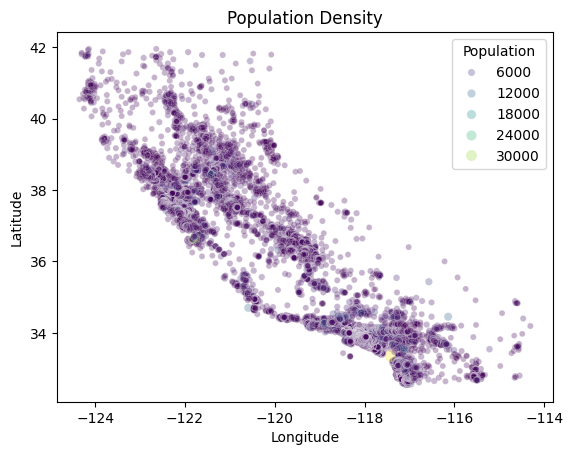

In [164]:
#visualize where populations are
sns.scatterplot(data=df, x='Longitude', y='Latitude', size='Population', alpha = 0.3, hue='Population',palette='viridis')
plt.title('Population Density')
plt.show()

In [165]:
#set delta in logitude and latitude so each 'step' will be about equal to n miles

n=10

step = 1/69 * n #n miles in degrees

#calculate an array for each step
cal_longitude = np.arange(df['Longitude'].min(), df['Longitude'].max()+step, step)
cal_latitude = np.arange(df['Latitude'].min(), df['Latitude'].max()+step, step)

print(cal_longitude)
print(df['Longitude'].max())

print(cal_latitude)
print(df['Latitude'].max())

#There is a bit of error, but it seems to be alright

[-124.35       -124.20507246 -124.06014493 -123.91521739 -123.77028986
 -123.62536232 -123.48043478 -123.33550725 -123.19057971 -123.04565217
 -122.90072464 -122.7557971  -122.61086957 -122.46594203 -122.32101449
 -122.17608696 -122.03115942 -121.88623188 -121.74130435 -121.59637681
 -121.45144928 -121.30652174 -121.1615942  -121.01666667 -120.87173913
 -120.72681159 -120.58188406 -120.43695652 -120.29202899 -120.14710145
 -120.00217391 -119.85724638 -119.71231884 -119.5673913  -119.42246377
 -119.27753623 -119.1326087  -118.98768116 -118.84275362 -118.69782609
 -118.55289855 -118.40797101 -118.26304348 -118.11811594 -117.97318841
 -117.82826087 -117.68333333 -117.5384058  -117.39347826 -117.24855072
 -117.10362319 -116.95869565 -116.81376812 -116.66884058 -116.52391304
 -116.37898551 -116.23405797 -116.08913043 -115.9442029  -115.79927536
 -115.65434783 -115.50942029 -115.36449275 -115.21956522 -115.07463768
 -114.92971014 -114.78478261 -114.63985507 -114.49492754 -114.35
 -114.205072

In [166]:
#create an array to store a total population for a block
populations = np.zeros((len(cal_longitude), len(cal_latitude)))
#print(populations)

for i in range(len(cal_longitude)):
  for j in range(len(cal_latitude)):
    sumss = df.query(f'{cal_longitude[i]} <= Longitude < {cal_longitude[i] + step} and {cal_latitude[j]} <= Latitude < {cal_latitude[j] + step}')['Population'].sum()
    #print(f'{cal_longitude[i]} <= Longitude < {cal_longitude[i] + step}

    populations[i, j] = sumss

In [167]:
population_density = populations / (n*n) #compute density in respect to n*n area

print(population_density)

flip = np.flip(population_density, axis=0) #flip x
print(flip)

[[ 0.    0.    0.   ... 81.11 12.44  0.  ]
 [ 0.    0.    0.   ... 92.64 20.49  0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]]
[[ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ... 92.64 20.49  0.  ]
 [ 0.    0.    0.   ... 81.11 12.44  0.  ]]


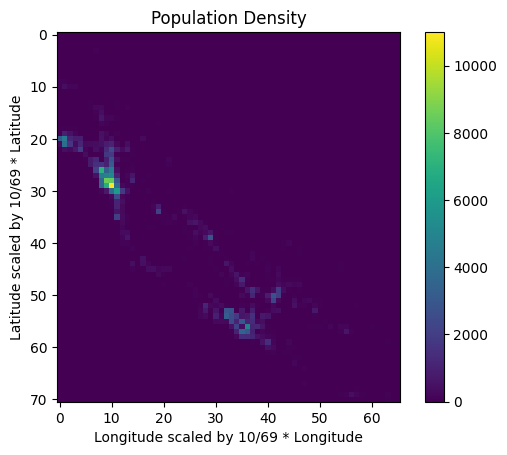

In [168]:
plt.imshow(flip, cmap = 'viridis') #view heatmap
plt.title('Population Density')
plt.colorbar()
plt.xlabel(f'Longitude scaled by {n}/69 * Longitude')
plt.ylabel(f'Latitude scaled by {n}/69 * Latitude')
plt.show()

>It seems nothern and southern california are the most densely populated zones. It seems LA and San Deigo are the most populated areas

## Exercise 3 (30 points)
# Create a pair plot for any 4 features
"""
Hints:
- Choose features that might have interesting relationships
- Consider using sns.pairplot()
- You might try different visualization styles:
    - Add hue parameter for categorical variables
    - Experiment with different plot styles
    - Adjust plot size for readability
- Interpret the relationships you observe

Example starter code:
```python
selected_features = ['PRICE', 'MedInc', 'AveRooms', 'AveOccup']
sns.pairplot(df[selected_features])
```
"""

In [169]:
print(df.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE', 'AGE_CATEGORY', 'Population_Density',
       'Households'],
      dtype='object')


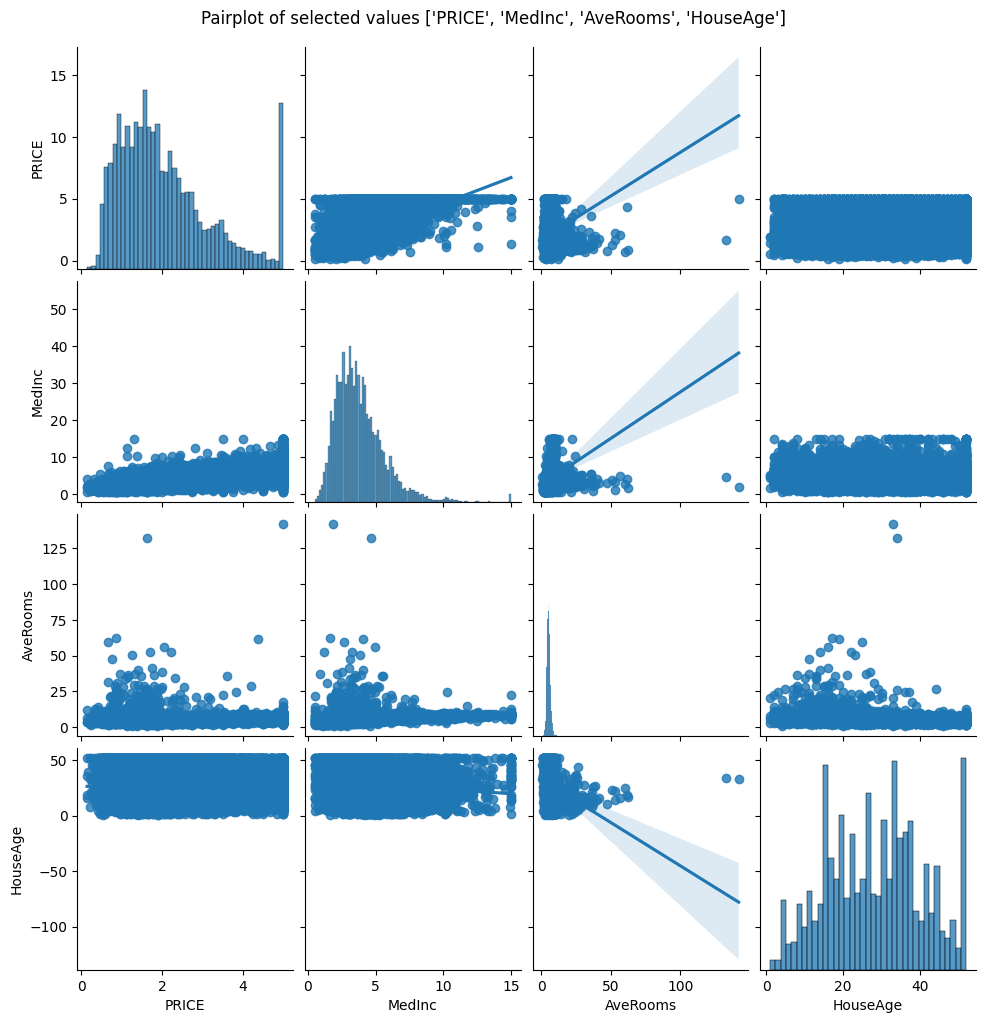

In [170]:
selected_features = ['PRICE', 'MedInc', 'AveRooms', 'HouseAge'] #select features to plot
sns.pairplot(df[selected_features], kind='reg') #add a regression line to pairplots
plt.suptitle(f'Pairplot of selected values {selected_features}', y = 1.02) #add title and offset title to not cut into plot
plt.show()

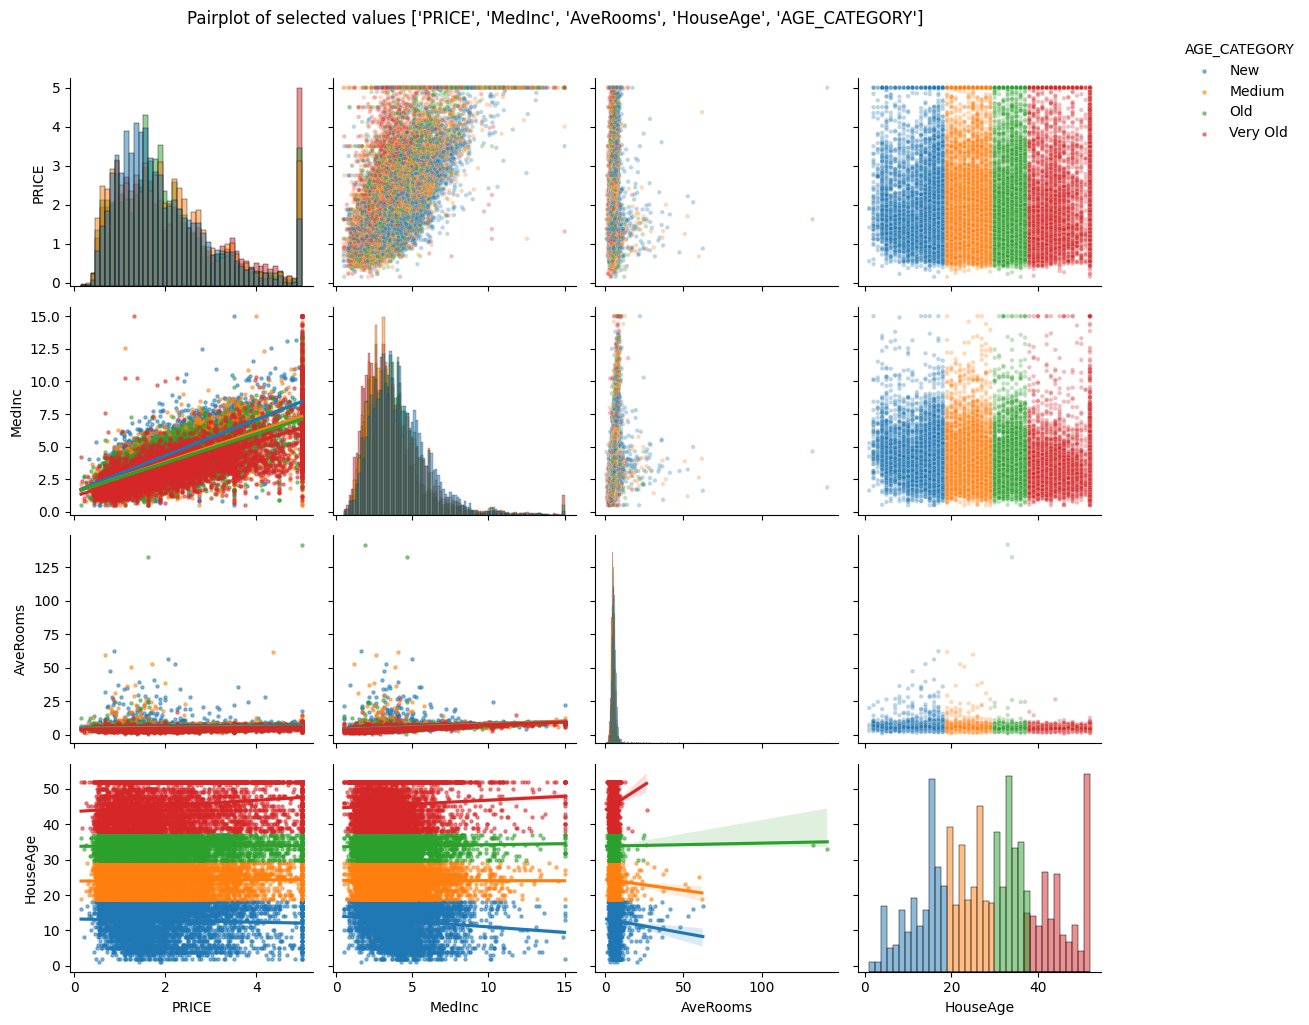

In [171]:
selected_features = ['PRICE', 'MedInc', 'AveRooms', 'HouseAge','AGE_CATEGORY'] #select features to plot
g = sns.PairGrid(df[selected_features], hue='AGE_CATEGORY', diag_sharey=False, corner=False) #added hue to repersent the AGE_CATEGORY of the house
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot, alpha=0.3, s=10) #scatterplot above diagonal; adj alpha
g.map_lower(sns.regplot, scatter_kws={'s': 5, 'alpha':0.5}) #reg plot below diagonal; change size and alpha
g.add_legend(bbox_to_anchor=(1.05, 1), loc='upper left')
g.fig.subplots_adjust(right=0.9)
plt.suptitle(f'Pairplot of selected values {selected_features}', y = 1.02) #add title and offset title to not cut into plot
plt.tight_layout() #fix layout
plt.show()

>I selected Price, because I wanted to compare and visualize the Price against the features that were most correlated to Price. The most correlated features according to the correlation matrix were Medinc, AveRooms, and HouseAge, in that order.

>When comparing Price vs the three features, only MedInc had a discenable linear relationship with price. In this case as MedInc rose, Price also tended to rise. This passes the sniff test, as people with more disposable income are more likely to be able to afford a more expennsive house.

>When comparing price to AveRooms, the trend was far harder to decipher. The correlation coefficient was only about 0.152 which is rather weak. This means the relationship between Price and AveRooms, it is hard to pick out a trend, much less imagine a trend line. I think there is a posibility, that there are expensive houses without as many rooms, potentially due to other variables, location perhaps?

>When comparing Price and HouseAge, we can see there are prices across the board for each "age" of the house. There is not one linear trend, but it seems from the regression line, the very old houses tended to be more positively correlated with an increased price.

>Now considering other interactions, it seems new houses tended to have more rooms on average. We can also see median income and house prices histograms are left skewed which checks out as only so much of a population can be top earners.

### Additional Challenges , optional (20 bonus points) ###


## Challenge 1 (10 points)
# Feature selection based on correlation
"""
Hints:
- Use correlation matrix as starting point
- Consider different correlation thresholds
- Look for both positive and negative correlations
- Document your selection criteria
"""

In [172]:
#find features most correlated with Price

price_corrl = (correlation_matrix['PRICE'].sort_values(ascending=False))

threshold = 0.1 #threshold for comparison

print(abs(price_corrl) > threshold)
print(price_corrl)

PRICE          True
MedInc         True
AveRooms       True
HouseAge       True
AveOccup      False
Population    False
Longitude     False
AveBedrms     False
Latitude       True
Name: PRICE, dtype: bool
PRICE         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: PRICE, dtype: float64


>I created a threshold variable to isolate values most correlated with price. I was able to select MedInc, AveRooms, and HouseAge as the most correlated values (abs(correl)) in respect to PRICE based on a threshold = 0.1. I know the threshold for correlation is weak, but the other features were not linear enough to pass the threshold.


## Challenge 2 (10 points)
# Summary statistics for categorical variables
"""
Hints:
- Include:
    - Value counts
    - Proportions
    - Cross-tabulations with other variables
    - Visual representations
"""

In [189]:
'''
Steps
-Get categorical variables
-Get value counts
-Get proportions
-Get cross-tabulations with other variables
-Visual representations
'''

#step1 get categorical variables
print(df_with_regions.head()) #check df

cat_cols = df_with_regions[['AGE_CATEGORY','NAME']] #get categorical columns
print(cat_cols) #check categorical columns

#step2 get value counts
print(df_with_regions.describe(include=['object', 'category'])) #get summary stats for categorical variables

#step3 get proportions
for col in cat_cols:
  print(df_with_regions[col].value_counts(normalize=True))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE AGE_CATEGORY  ... CSAFP  CBSAFP METDIVFP FUNCSTAT  \
0    -122.23  4.526     Very Old  ...   488   41860    36084        A   
1    -122.22  3.585       Medium  ...   488   41860    36084        A   
2    -122.24  3.521     Very Old  ...   488   41860    36084        A   
3    -122.25  3.413     Very Old  ...   488   41860    36084        A   
4    -122.25  3.422     Very Old  ...   488   41860    36084        A   

          ALAND       AWATER     INTPTLAT      INTPTLON     Shape_Leng  \
0  1.909615e+09  216907015.0  

In [174]:
#step4 cross tabulate
pd.crosstab(df_with_regions['AGE_CATEGORY'], df_with_regions['NAMELSAD']) #Cross tabulation of AGE_CATEGORY AND COUNTY

NAMELSAD,Alameda County,Alpine County,Amador County,Butte County,Calaveras County,Colusa County,Contra Costa County,Del Norte County,El Dorado County,Fresno County,...,Sonoma County,Stanislaus County,Sutter County,Tehama County,Trinity County,Tulare County,Tuolumne County,Ventura County,Yolo County,Yuba County
AGE_CATEGORY,,,,,,,,,,,,,,,,,,,,,
New,117,3,19,54,24,2,179,8,71,174,...,116,102,14,17,13,80,36,134,25,17
Medium,168,0,6,57,5,4,159,8,43,146,...,93,78,22,19,12,109,11,158,17,19
Old,199,0,2,19,3,2,140,0,4,111,...,55,70,10,9,2,46,6,58,23,12
Very Old,533,0,1,26,0,8,119,0,2,94,...,49,53,10,4,0,23,4,34,14,5


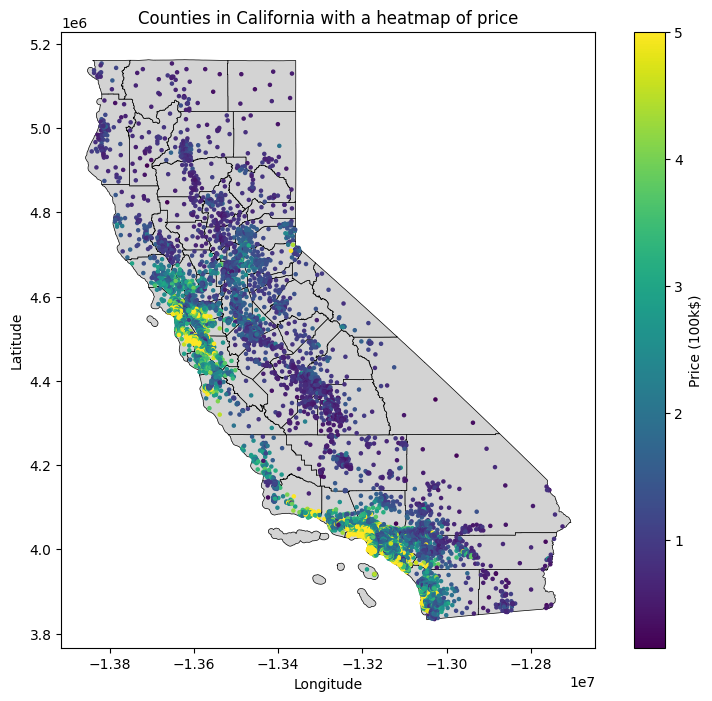

In [175]:
#visualize prices against county lines

fig, ax = plt.subplots(1, 1, figsize=(10, 8))  # Adjust figure size if needed

if 'california_counties' in locals(): #check if the variable exists
    california_counties.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)
    ax.set_title("Counties in California with a heatmap of price")
else:
    counties.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5) #plot all counties
    ax.set_title("County Boundaries")

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
df_with_regions.plot(ax=ax, column='PRICE', cmap='viridis', marker='o', markersize=5, label='Price', legend=True)
colorbar = fig.get_figure().axes[1]
colorbar.set_ylabel("Price (100k$)")
plt.show()


## Other ideas

In [176]:
#find populations of counties
population_by_county = df_with_regions.groupby('NAMELSAD')['Population'].sum()
print(population_by_county.sort_values(ascending=False)[:5]) #top 5 counties by population

print(f'Total population {population_by_county.sum()}') #total population

NAMELSAD
Los Angeles County       8779957.0
San Diego County         2446180.0
Orange County            2369778.0
Santa Clara County       1485976.0
San Bernardino County    1409740.0
Name: Population, dtype: float64
Total population 29420103.0


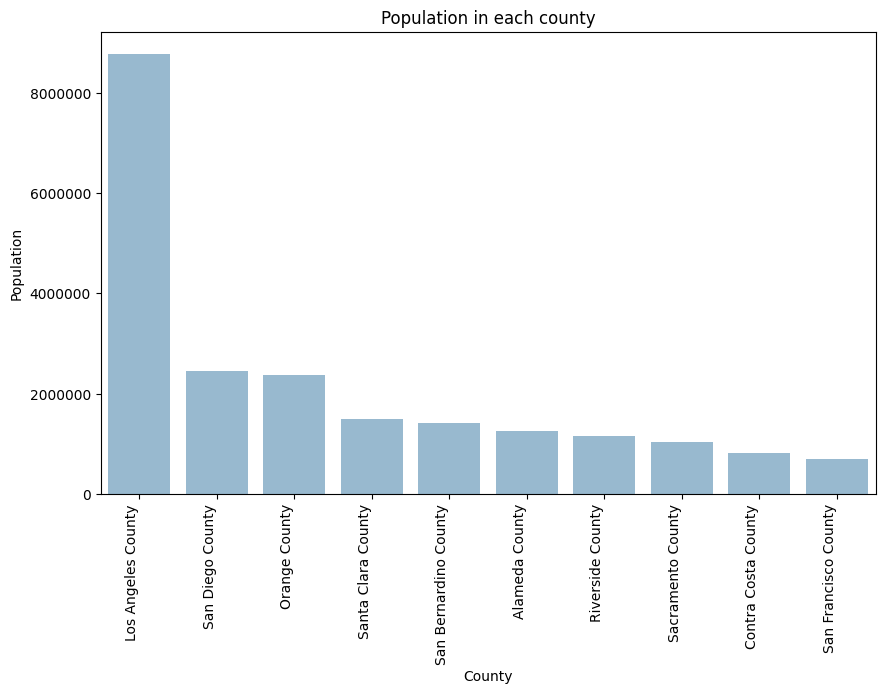

In [177]:
#visualize population counties

population_by_county = population_by_county.sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=population_by_county.index, y=population_by_county.values, alpha=0.5)
plt.title('Population in each county')
plt.xlabel('County')
plt.xticks(rotation=90, ha='right') #rotate xlabels to prevent overlaping
plt.ylabel('Population')
plt.gca().ticklabel_format(style='plain', axis='y') #force y label to plain
plt.show()

In [178]:
#try to get county size to get county population/county area for density

california_counties2 = california_counties.copy()
california_counties2 = california_counties2.to_crs("EPSG:2163") #change to american units projected
california_counties2['area_projected'] = california_counties2.geometry.area #find area of geometry feature

SQ_M_TO_SQ_MI = 0.000000386102 #unit conversion

california_counties2['area_projected_sqmi'] = california_counties2['area_projected'] * SQ_M_TO_SQ_MI #convert projected area to sqmi

california_counties2.drop(columns=['area_projected'], inplace=True) #drop area_projected column

In [179]:
population_by_county = df_with_regions.groupby('NAMELSAD')['Population'].sum()

california_counties2['Population'] = california_counties2['NAMELSAD'].map(population_by_county) #add population column
california_counties2['Population_Density'] = california_counties2['Population'] / california_counties2['area_projected_sqmi'] #add population density column

In [180]:
print(california_counties2[['NAME','Population_Density']].sort_values(by='Population_Density', ascending=False)[:5]) #view population density of the top 5

             NAME  Population_Density
10  San Francisco         3031.088815
47         Orange         2498.886519
5     Los Angeles         1847.527476
41        Alameda         1529.978457
38    Santa Clara         1139.995338


In [2]:
#visualize prices against county lines

california_counties2 = california_counties2.to_crs("EPSG:3857") #change to american units projected

fig, ax = plt.subplots(1, 1, figsize=(10, 8))  # Adjust figure size if needed

#plot counties with color based on population density
california_counties2.plot(ax=ax,
                          column='Population_Density',
                          cmap='Reds',
                          edgecolor='black',
                          linewidth=0.5,
                          legend=True,
                          legend_kwds={'label': "Population Density", 'shrink': 0.75}
                          )

#label plot
ax.set_title("Population Density Heatmap of CA Counties with price markers", y=1.02)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

ax.set_xticklabels([])
ax.set_yticklabels([])

#overlay price data
df_with_regions.plot(ax=ax,
                     column='PRICE',
                     cmap='viridis',
                     marker='o',
                     markersize=3,
                     alpha=0.1,
                     label='Price',
                     legend=True,
                     legend_kwds={'label': "Price ($100k)", 'shrink': 0.75}
                     )

#create colorbars
colorbar = fig.get_figure().axes[1]
plt.show()

NameError: name 'california_counties2' is not defined

In [ ]:
#add population density to california housing data based on the county the house is located in
df_with_regions2 = df_with_regions.copy() #create copy

merged_df = df_with_regions2.merge(california_counties2, on='NAME', how='left')

df_with_regions2['Population_Density2'] = merged_df['Population_Density']

In [ ]:
feature_drop = ['index_right','STATEFP', 'COUNTYFP', 'COUNTYNS', 'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP','FUNCSTAT'] #drop unused features

df_with_regions2.drop(columns=feature_drop, inplace=True)

In [ ]:
df_with_regions2